# Load necessary packages

In [2]:
%matplotlib inline
import geopandas as gpd
from matplotlib import pyplot as plt

# make sure you are in oy-env

In [215]:
## Might not need all of these, from http://darribas.org/gds15/content/labs/lab_03.html#Styling-plots

# import matplotlib.pyplot as plt
# import geopandas as gpd
# # import pysal as ps
# from pysal.contrib.viz import mapping as maps

# Load necessary data

In [3]:
# Import Washington PUMA Data
wa_puma = gpd.read_file("data/raw/tl_2017_53_puma10.shp") 

DriverError: data/raw/tl_2017_53_puma10.shp: No such file or directory

In [175]:
# Trying to find where West Seattle is
# wa_puma['NAMELSAD10'].str.contains('Seattle')


,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5..."
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6..."
38,53,11601,5311601,Seattle City (Northwest) PUMA,G6120,S,43437175,5995523,+47.6909932,-122.3619886,"POLYGON ((-122.34043 47.64125, -122.34306 47.6..."
49,53,11604,5311604,Seattle City (Southeast)--Capitol Hill PUMA,G6120,S,34295850,20392827,+47.5815050,-122.2745821,"POLYGON ((-122.24578 47.56903, -122.24415 47.5..."
50,53,11602,5311602,Seattle City (Northeast) PUMA,G6120,S,39486895,13834057,+47.6857542,-122.2858124,"POLYGON ((-122.29652 47.73378, -122.29531 47.7..."


In [178]:
## Converts PUMACE10 Column from string to integer
wa_puma.loc[:,'PUMACE10'] = wa_puma['PUMACE10'].astype(int)

In [179]:
# Selects all PUMA codes for King County (including Seattle) PUMAs and puts into Subset
kc_puma = wa_puma.loc[(wa_puma.PUMACE10 >= 11601 ) & (wa_puma.PUMACE10 <= 11616)]

In [269]:
# List of PUMA #'s for S. Seattle and S. King County
skc_puma_list = [11604, 11605, 11610, 11611, 11612, 11613, 11614]

In [270]:
## Creates a new column, KCS and assigns a 1 if the PUMA is in S. King Country, or 0 otherwise
skc_puma = kc_puma.assign(KCS = [1 if row in skc_puma_list else 0 for row in kc_puma['PUMACE10']]) 

In [271]:
skc_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry,KCS
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2...",1
32,53,11616,5311616,"King County (Northeast)--Snoqualmie City, Cott...",G6120,S,2477645989,49838932,+47.5779171,-121.6433869,"POLYGON ((-121.87736 47.50068, -121.87745 47.5...",0
35,53,11611,5311611,"King County (West Central)--Burien, SeaTac, Tu...",G6120,S,104685305,6835973,+47.4500687,-122.3101564,"POLYGON ((-122.26541 47.48933, -122.26516 47.4...",1
36,53,11605,5311605,Seattle City (West)--Duwamish & Beacon Hill PUMA,G6120,S,70104140,10124676,+47.5521279,-122.3523950,"POLYGON ((-122.32246 47.59583, -122.32147 47.5...",1
37,53,11603,5311603,Seattle City (Downtown)--Queen Anne & Magnolia...,G6120,S,29279826,8323991,+47.6391415,-122.3720415,"POLYGON ((-122.32238 47.65293, -122.32234 47.6...",0
38,53,11601,5311601,Seattle City (Northwest) PUMA,G6120,S,43437175,5995523,+47.6909932,-122.3619886,"POLYGON ((-122.34043 47.64125, -122.34306 47.6...",0
39,53,11606,5311606,"King County (Northwest)--Shoreline, Kenmore & ...",G6120,S,75073924,5794567,+47.7564420,-122.2787890,"POLYGON ((-122.25359 47.73566, -122.26084 47.7...",0
41,53,11615,5311615,"King County (Southeast)--Maple Valley, Covingt...",G6120,S,1704963276,21281417,+47.2986756,-121.7866429,"POLYGON ((-121.99603 47.28012, -121.99615 47.2...",0
42,53,11614,5311614,King County (Southwest)--Auburn City & Lakelan...,G6120,S,177945706,2750138,+47.2844346,-122.1690701,"POLYGON ((-122.21930 47.25746, -122.21948 47.2...",1
44,53,11613,5311613,King County (Southwest Central)--Kent City PUMA,G6120,S,96646675,1914377,+47.3879703,-122.2127275,"POLYGON ((-122.20242 47.34461, -122.20287 47.3...",1


## Visualization of South King County

In [1]:
# current best map
f, ax = plt.subplots(1, figsize=(18, 18))
ax.set_title('Map of King County')
ax.set_aspect('equal')
# skc_puma.plot(ax=ax, column='KCS', cmap='Accent_r', alpha = .5, linewidth=1, edgecolor='grey', legend = False)
wa_puma.plot(ax=ax, alpha = 0.1, linewidth=1, edgecolor='grey', legend = False)
ax.set_axis_off()
plt.show();




NameError: name 'plt' is not defined

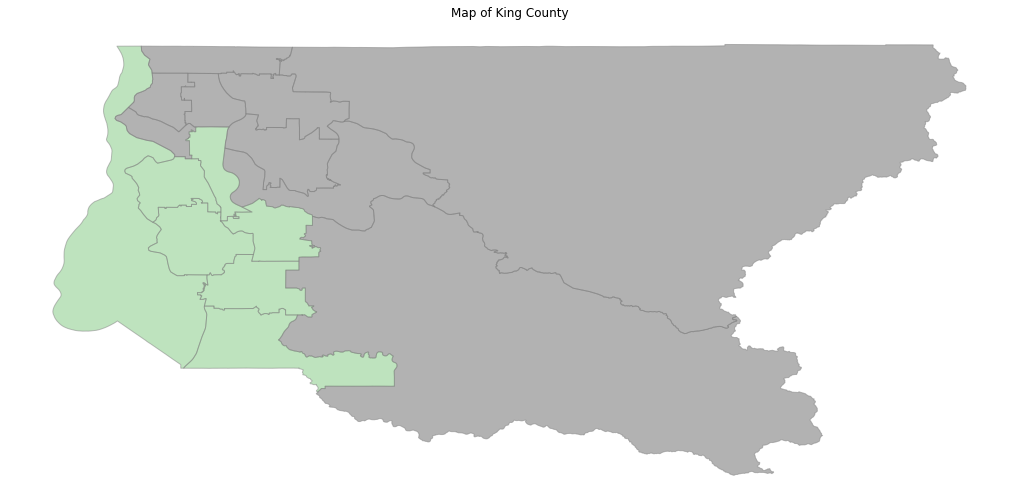

In [335]:
#current 'best map' of King County
f, ax = plt.subplots(1, figsize=(18, 18))
ax = skc_puma.plot(ax=ax, column='KCS', cmap='Accent_r', alpha = .5, linewidth=1, edgecolor='grey',  legend = False)
ax.set_title('Map of King County')
ax.set_axis_off()
plt.show();

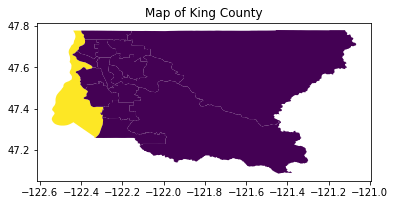

<Figure size 1440x1440 with 0 Axes>

In [65]:
## 11612 is also mapping Puget Sound.. can we fix that?

# fig, ax = plt.subplots(1, 1)
# fig = plt.figure(figsize=(20,20))
# ax.set_title('Map of King County')
# kc_puma.plot(column='KCS', ax=ax, legend=False);

# Plot the spacial data frame as a map

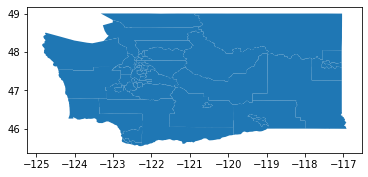

In [196]:
wa_puma.plot()

In [202]:
wa_puma

,STATEFP10,PUMACE10,GEOID10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,geometry
0,53,10200,5310200,"Skagit, Island & San Juan Counties PUMA",G6120,S,5470622131,2441658886,+48.4470835,-122.1737477,"POLYGON ((-122.44422 48.64527, -122.43685 48.6..."
1,53,10100,5310100,Whatcom County--Bellingham City PUMA,G6120,S,5459332804,1028183246,+48.8426531,-121.8364325,"POLYGON ((-122.40642 49.00230, -122.40617 49.0..."
2,53,10400,5310400,"Stevens, Okanogan, Pend Oreille & Ferry Counti...",G6120,S,29389124389,489162432,+48.5031090,-118.7866777,"POLYGON ((-118.14859 47.88667, -118.14899 47.8..."
3,53,10504,5310504,Spokane County (Outer)--Cheney City PUMA,G6120,S,3983412021,35812133,+47.5972847,-117.1210417,"POLYGON ((-117.10528 47.61018, -117.10527 47.6..."
4,53,10503,5310503,Spokane County (East Central)--Greater Spokane...,G6120,S,270926976,5004332,+47.6561281,-117.1818649,"POLYGON ((-117.15534 47.69971, -117.15509 47.6..."
5,53,10600,5310600,"Whitman, Asotin, Adams, Lincoln, Columbia & Ga...",G6120,S,22300152581,179320877,+46.9464148,-118.0223129,"POLYGON ((-117.38268 45.99804, -117.38543 45.9..."
6,53,10703,5310703,"Walla Walla, Benton (Outer) & Franklin (Outer)...",G6120,S,10401922840,248495777,+46.3118847,-119.0424324,"POLYGON ((-118.34166 46.73725, -118.33925 46.7..."
7,53,11000,5311000,"Lewis, Klickitat & Skamania Counties PUMA",G6120,S,15362252097,245302530,+46.2873462,-121.7656479,"POLYGON ((-122.14167 46.75410, -122.14165 46.7..."
8,53,11502,5311502,Pierce County (Northwest)--Peninsula Region & ...,G6120,S,350604568,243415998,+47.2822884,-122.6738855,"POLYGON ((-122.55705 47.40342, -122.55695 47.4..."
9,53,11612,5311612,"King County (Far Southwest)--Federal Way, Des ...",G6120,S,160638807,279665546,+47.4764651,-122.4271168,"POLYGON ((-122.33587 47.26382, -122.33676 47.2..."


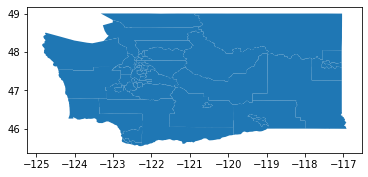

In [204]:
wa_puma.plot(alpha=1)